In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

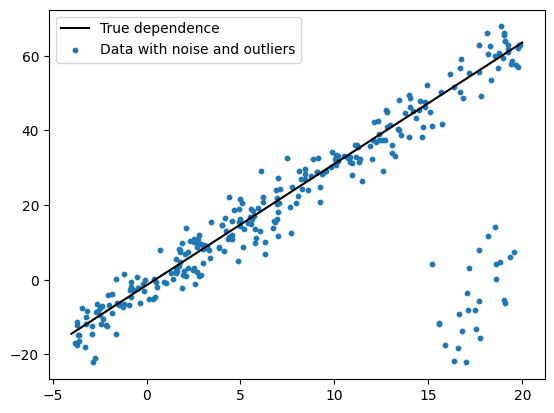

In [10]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

Gradient Descent Coefficients (w0, w1): [[4.18780609]
 [3.01791581]]
Sklearn LinearRegression Coefficients (Intercept, Coefficient): [4.22215108] [[2.96846751]]


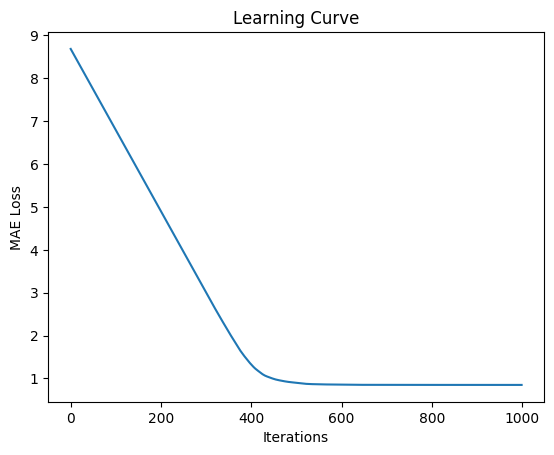

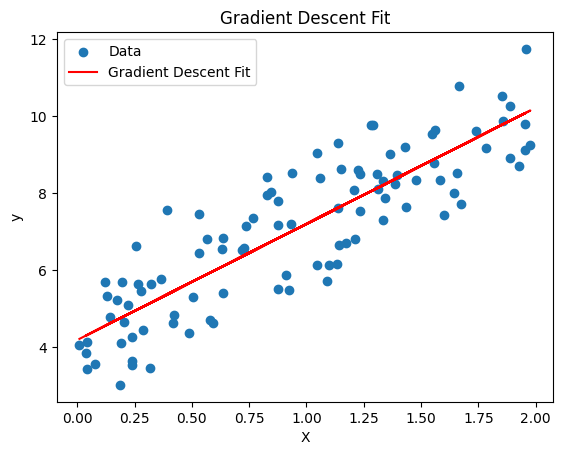

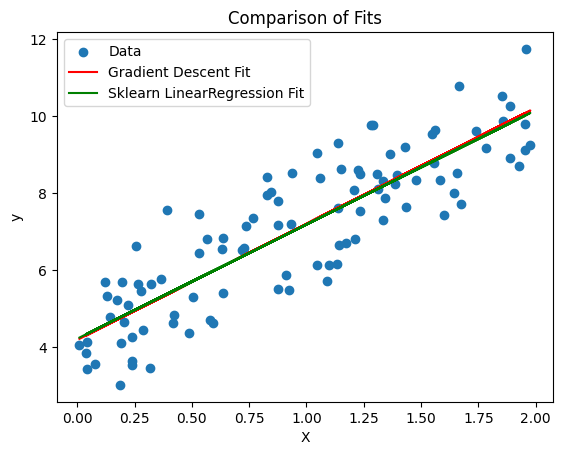

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Generate some sample data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a constant feature (bias term)
X_b = np.c_[np.ones((100, 1)), X]

# Initialize the model parameters
w = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Lists to store the cost and parameter history for plotting
cost_history = []

# Gradient Descent
for iteration in range(num_iterations):
    y_pred = np.dot(X_b, w)
    errors = y_pred - y
    gradient = (1/len(y)) * np.dot(X_b.T, np.sign(errors))
    w -= learning_rate * gradient
    cost = np.mean(np.abs(errors))
    cost_history.append(cost)

# Plot the learning curve
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('MAE Loss')
plt.title('Learning Curve')

# Final fit
plt.figure()
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, 'r-', label='Gradient Descent Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Fit')
plt.legend()

# Fit the same data with sklearn's LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)
sklearn_pred = sklearn_model.predict(X)

# Compare the two fits on the same plot
plt.figure()
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, 'r-', label='Gradient Descent Fit')
plt.plot(X, sklearn_pred, 'g-', label='Sklearn LinearRegression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Fits')
plt.legend()

# Print the final coefficients
print("Gradient Descent Coefficients (w0, w1):", w)
print("Sklearn LinearRegression Coefficients (Intercept, Coefficient):", sklearn_model.intercept_, sklearn_model.coef_)

plt.show()


## Task 2 (2 + 1 points)

* Wrap your solution from the previous task into a class. Plot the learning curve and the final fit. Compare and comment your results with the previos ones. **(2 points)**

* Make it possible to choose a loss function. **(1 point)**

In [12]:
from sklearn.base import BaseEstimator, RegressorMixin

In [13]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    def __init__(self):
        raise NotImplementedError

    def fit(self, x, y):
        raise NotImplementedError

    def predict(self, x):
        raise NotImplementedError

    def fit_predict(self, x, y):
        raise NotImplementedError

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

class CustomLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, loss_function='mae', learning_rate=0.01, num_iterations=1000):
        self.loss_function = loss_function
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        N, M = X.shape
        X_b = np.c_[np.ones((N, 1)), X]
        self.theta = np.random.randn(M + 1, 1)

        for iteration in range(self.num_iterations):
            y_pred = np.dot(X_b, self.theta)
            errors = y_pred - y

            if self.loss_function == 'mae':
                gradient = (1/N) * np.dot(X_b.T, np.sign(errors))
                cost = np.mean(np.abs(errors))
            elif self.loss_function == 'mse':
                gradient = (2/N) * np.dot(X_b.T, errors)
                cost = np.mean(errors ** 2)
            else:
                raise ValueError("Unsupported loss function")

            self.theta -= self.learning_rate * gradient
            self.cost_history.append(cost)

        return self

    def predict(self, X):
        if self.theta is None:
            raise ValueError("Model has not been trained. Please call fit first.")
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X_b, self.theta)

    def plot_learning_curve(self):
        plt.plot(range(self.num_iterations), self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Learning Curve')
        plt.show()

    def compare_with_sklearn(self, X, y):
        sklearn_model = LinearRegression()
        sklearn_model.fit(X, y)
        sklearn_pred = sklearn_model.predict(X)

        # Custom model predictions
        custom_pred = self.predict(X)

        # Compare the two fits on the same plot
        plt.scatter(X, y, label='Data')
        plt.plot(X, custom_pred, 'r-', label=f'Custom Model ({self.loss_function} Loss)')
        plt.plot(X, sklearn_pred, 'g-', label='Sklearn LinearRegression')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Comparison of Fits')
        plt.legend()
        plt.show()
